# Task 1

## Classification of Iris Dataset


Pravart Srivastava

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv("Iris.csv")
data.shape

(150, 6)

In [3]:
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
data.tail(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,141,6.7,3.1,5.6,2.4,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


## Data Cleaning 
 

In [6]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
data.drop('Id',inplace=True,axis=1)

In [8]:
data.columns
cols = list(data.columns)
cols


['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

## Scaling the values ( Data Normalisation) 

####  Using the min-max method to scale the values down 

In [9]:
range = data["SepalLengthCm"].max() - data["SepalLengthCm"].min()
range

3.6000000000000005

In [10]:
data["SepalLengthCm"] = (data["SepalLengthCm"] - data["SepalLengthCm"].min())/range
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0.222222,3.5,1.4,0.2,Iris-setosa
1,0.166667,3.0,1.4,0.2,Iris-setosa
2,0.111111,3.2,1.3,0.2,Iris-setosa
3,0.083333,3.1,1.5,0.2,Iris-setosa
4,0.194444,3.6,1.4,0.2,Iris-setosa


In [11]:
data["SepalLengthCm"] = data["SepalLengthCm"] / data["SepalLengthCm"].max()

In [12]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0.222222,3.5,1.4,0.2,Iris-setosa
1,0.166667,3.0,1.4,0.2,Iris-setosa
2,0.111111,3.2,1.3,0.2,Iris-setosa
3,0.083333,3.1,1.5,0.2,Iris-setosa
4,0.194444,3.6,1.4,0.2,Iris-setosa


In [16]:
data = pd.read_csv("Iris.csv")
data.shape

(150, 6)

In [17]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Plotting the data



In [18]:
group_names = data['Species'].unique().tolist()
group_names

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [19]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

### Scatterplots

#### SepalLength vs SepalWidth 

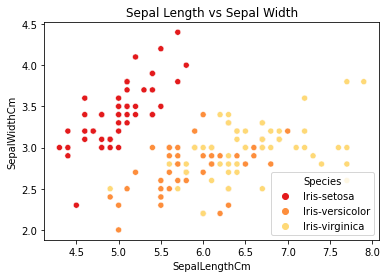

In [30]:
sns.scatterplot(x = 'SepalLengthCm', y = 'SepalWidthCm', data = data, hue = 'Species', palette = 'YlOrRd_r')
plt.title('Sepal Length vs Sepal Width')
plt.show()

In [31]:
data['SepalLengthCm'].corr(data['SepalWidthCm'])

-0.10936924995064935

> **Analysis**: We can see that there is a lot of correlation in Iris-Setosa category when it comes to Sepal Length and SepalWidth but not a similar distinction for the other two categories. The correlation does not seem very strong either. 

#### PetalLength vs PetalWidth

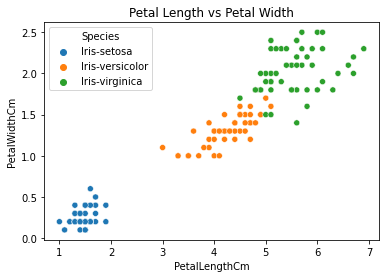

In [32]:
sns.scatterplot(x = 'PetalLengthCm', y = 'PetalWidthCm', data = data ,hue ='Species')
plt.title('Petal Length vs Petal Width')
plt.show()

In [33]:
data['PetalLengthCm'].corr(data['PetalWidthCm'])

0.9627570970509662

> **Analysis**: This is a very insightful graph. It tells us that we can use PetalLength to predict PetalWidth and it's category because of the proper clustrering of data points. The correlation is also very high. We can use these features for regression analysis later. **

#### PetalLength vs SepalLength

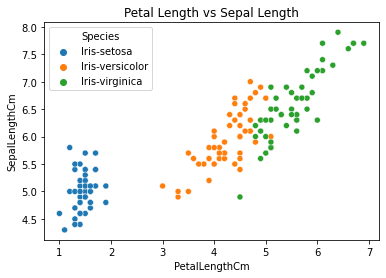

In [34]:
sns.scatterplot(x = 'PetalLengthCm', y = 'SepalLengthCm', data = data ,hue ='Species')
plt.title('Petal Length vs Sepal Length')
plt.show()

In [35]:
data['PetalLengthCm'].corr(data['SepalLengthCm'])

0.8717541573048714

> **Analysis**: There is high correlation but we still do not get a very linear graph which is important. There is good  clustering but let's see if we can get something better 

#### PetalWidth vs SepalWidth

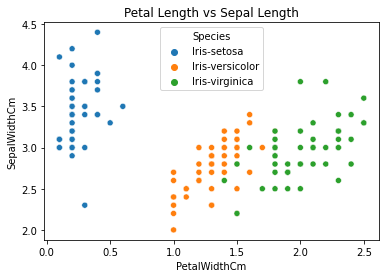

In [36]:
sns.scatterplot(x = 'PetalWidthCm', y = 'SepalWidthCm', data = data ,hue ='Species')
plt.title('Petal Length vs Sepal Length')
plt.show()

In [37]:
data['PetalWidthCm'].corr(data['SepalWidthCm'])

-0.35654408961380574

> **Analysis**: There isn't a lot of correlation. There is good clustering but let's see if we can get something better 

### Boxplot

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

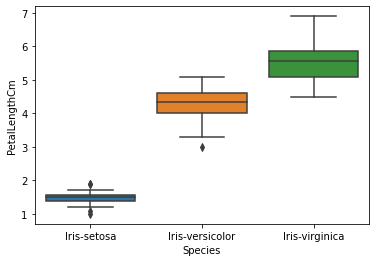

In [38]:
sns.boxplot(x = "Species", y = "PetalLengthCm", data = data)

## Correlation Heat Map
Let's make a correlation heatmap to understand the correlation between different species.

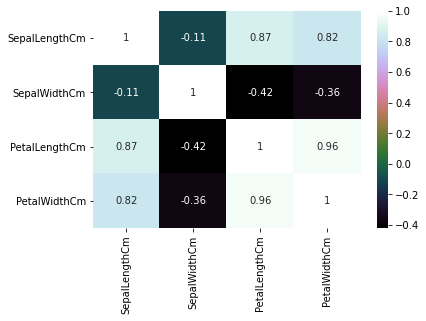

In [44]:
no_id_data = data.copy()
no_id_data.drop("Id", axis = 1, inplace = True)
sns.heatmap(data = no_id_data.corr(), annot = True, cmap = 'cubehelix')
plt.show()

We can see that there is a very high correlation between Petal Length and Petal Width. 

## Linear Regression  


In [45]:
x_values = data['PetalLengthCm'].copy()
y_values = data['PetalWidthCm'].copy()

In [46]:
x_train, x_test, y_train1, y_test1 = train_test_split(x_values, y_values, test_size = 0.33, random_state = 3)

Regression Libraries

In [47]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

<p style="font-family: Arial; font-size:1.75em;color:blue; font-style:bold">
Convert to a Classification Task <br></p>


### Adding Dummy Variables 


In [48]:
species_dummy = pd.get_dummies(data["Species"])
species_dummy.head()

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [49]:
assigned_data = data.copy()

In [50]:
assigned_data = pd.concat([data, species_dummy], axis = 1)
assigned_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1,0,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1,0,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1,0,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1,0,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1,0,0


Classification 

In [51]:
assigned_data.drop(["Id"], inplace = True, axis = 1)
assigned_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,Iris-setosa,1,0,0
1,4.9,3.0,1.4,0.2,Iris-setosa,1,0,0
2,4.7,3.2,1.3,0.2,Iris-setosa,1,0,0
3,4.6,3.1,1.5,0.2,Iris-setosa,1,0,0
4,5.0,3.6,1.4,0.2,Iris-setosa,1,0,0


In [52]:
target = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
features = cols[0:4]
print(target)
print(features)

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


In [53]:
y = assigned_data[target].copy()
X = assigned_data[features].copy()

Dividing the data into training and test sets

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 3)

In [55]:
print(X_train.describe())
X_train.head()

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     135.000000    135.000000     135.000000    135.000000
mean        5.869630      3.055556       3.814815      1.221481
std         0.814997      0.428581       1.746960      0.760733
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.500000      1.400000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.200000       6.700000      2.500000


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
40,5.0,3.5,1.3,0.3
72,6.3,2.5,4.9,1.5
135,7.7,3.0,6.1,2.3
113,5.7,2.5,5.0,2.0
42,4.4,3.2,1.3,0.2


In [56]:
y_train.head(10)

,Iris-setosa,Iris-versicolor,Iris-virginica
40,1,0,0
72,0,1,0
135,0,0,1
113,0,0,1
42,1,0,0
126,0,0,1
112,0,0,1
141,0,0,1
76,0,1,0
5,1,0,0


We can see now that we have quite a randomized group of values for y_train and X_train. Let's build our classifier model. 

In [57]:
iris_classifier = DecisionTreeClassifier(max_leaf_nodes = 4, random_state = 0)
iris_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=4, random_state=0)

In [59]:
y_prediction = iris_classifier.predict(X_test)

In [60]:
y_prediction[0 : 10]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0]], dtype=uint8)

In [61]:
y_test[0:10]

,Iris-setosa,Iris-versicolor,Iris-virginica
47,1,0,0
3,1,0,0
31,1,0,0
25,1,0,0
15,1,0,0
118,0,0,1
89,0,1,0
6,1,0,0
103,0,0,1
65,0,1,0


<p style="font-family: Arial; font-size:1.75em;color:blue; font-style:bold"><br>

Measure Accuracy of the Classifier
<br><br></p>


In [42]:
accuracy_score(y_true = y_test, y_pred = y_prediction)

1.0